## **М19-ИВТ3**
## **Тотменина Елена**
## **Вариант-6**

### Подготовка: импорт модулей, монтирование диска и установка тюнера 

In [11]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import datasets, linear_model

%matplotlib inline

!pip install -U keras-tuner

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.1)


### Анализ данных

In [20]:
dataset_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train.csv", error_bad_lines=False)
dataset_train.shape
dataset_train.iloc[:1,:132]

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.7263,0.245921,0.187583,0.789639,0.310061,0.718367,0.33506,0.3026,0.67135,0.8351,0.569745,0.594646,0.822493,0.714843,2213.18


In [21]:
# Отделение loss от тренировочной выборки
loss = dataset_train['loss']
features = dataset_train.drop('loss', axis=1)
# Анализ непрерывных величин (1-14)
features.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


In [22]:
# Статистика по loss

mini_loss = np.amin(loss)
max_loss = np.amax(loss)
mean_loss = np.mean(loss)
std_loss = np.std(loss)
median_loss = np.median(loss)

print("Minimum Loss {}".format(mini_loss))
print("Maximum Loss {}".format(max_loss))
print("Mean Loss {}".format(mean_loss))
print("Standard Deviation Loss {}".format(std_loss))
print("Median Loss {}".format(median_loss))

Minimum Loss 0.67
Maximum Loss 121012.25
Mean Loss 3037.3376856699792
Standard Deviation Loss 2904.078475789109
Median Loss 2115.5699999999997


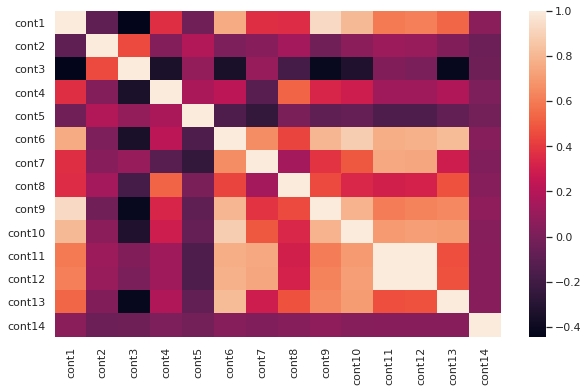

In [23]:
# Heatmap для изучения корелляции по непрерывным значениям 

plt.figure(figsize=(10, 6))
sns.set()
sns.heatmap(features.iloc[:,117:].corr())

### Подготовка данных

In [24]:
# После one hot encode категориальных значений 116 cat преобразовались
# в 1139 + 14 cont значений + 1 id = 1154 столбцов  

features = pd.get_dummies(features)
print(features.shape)

(188318, 1154)
   id     cont1     cont2     cont3  ...  cat116_V  cat116_W  cat116_X  cat116_Y
0   1  0.726300  0.245921  0.187583  ...         0         0         0         0
1   2  0.330514  0.737068  0.592681  ...         0         0         0         0
2   5  0.261841  0.358319  0.484196  ...         0         0         0         0
3  10  0.321594  0.555782  0.527991  ...         0         0         0         0
4  11  0.273204  0.159990  0.527991  ...         0         0         0         0

[5 rows x 1154 columns]


In [26]:
# Убираем столбец id
features = features.drop('id',axis=1)

# Отделение непрерывных значений
cont_features = features.iloc[:,:14]

# Отделение категориальных значений
cat_features = features.iloc[:,14:]

In [27]:
# PCA на непрерывных значениях

list = []

# PCA с числом компонентов = 11
pca = PCA(n_components=11)

# Установка
pca.fit(cont_features)

# Применение трансформирования
reduced_cont_feature = pca.transform(cont_features)

# принтим коэффициент дисперсии, чтобы показать дисперсию для всех 11 компонентов
list.append(pca.explained_variance_ratio_)
print(list)

[array([0.42170992, 0.14249156, 0.11176714, 0.08600408, 0.06442122,
       0.05740309, 0.03954402, 0.02668232, 0.01976975, 0.01604432,
       0.00870777])]


In [28]:
list = []

pca = PCA(n_components=345)

# Установка в 345 компонент
pca.fit(cat_features)

# Применение
reduced_cat_feature = pca.transform(cat_features)

# 345 параметров представляют 99% отклонения в категориальных характеристиках
list.append(pca.explained_variance_ratio_)
print(list)

[array([7.96106242e-02, 7.00096200e-02, 4.70303287e-02, 3.77362005e-02,
       3.30581939e-02, 2.88104569e-02, 2.74226770e-02, 2.33783280e-02,
       2.02456730e-02, 1.83931801e-02, 1.75700057e-02, 1.64298833e-02,
       1.53714602e-02, 1.45657402e-02, 1.37490646e-02, 1.15876750e-02,
       1.07745020e-02, 1.03307611e-02, 9.96816024e-03, 9.38824098e-03,
       9.23502134e-03, 9.07904985e-03, 8.72246741e-03, 8.69815055e-03,
       8.47485814e-03, 8.31786465e-03, 7.54830547e-03, 7.36155031e-03,
       7.20590565e-03, 7.15115710e-03, 7.02155353e-03, 6.78591128e-03,
       6.65965252e-03, 6.28775173e-03, 6.07048896e-03, 5.82300958e-03,
       5.79717698e-03, 5.72363231e-03, 5.17529781e-03, 5.06072943e-03,
       5.03575911e-03, 4.94948273e-03, 4.90831772e-03, 4.75569553e-03,
       4.51001193e-03, 4.49523210e-03, 4.28585044e-03, 4.25227783e-03,
       4.20677758e-03, 4.10642313e-03, 4.01568656e-03, 3.94283184e-03,
       3.89402403e-03, 3.87446702e-03, 3.79899893e-03, 3.61997240e-03,
     

In [29]:
# Объединение категориальных и непрерывных значений в один сет 
reduced_feature = np.hstack((reduced_cat_feature,reduced_cont_feature))
reduced_feature.shape

(188318, 356)

In [30]:
# Проверка смещения распределения до и после преобразований. Получено нормальное или равноменое распределение

print("data skewness before log transform {}".format(loss.skew()))
loss_log = np.log(loss+1)
print("data skewness after log transform {}".format(loss_log.skew()))

data skewness before log transform 3.7949583775378604
data skewness after log transform 0.0966195895031505


### Функция вычисления mae

In [31]:
# Показатель для средней абсолютной ошибки. 

def performance_metric(y_true, y_predict):
    """ Вычисляет и возвращает оценку производительности между
        истинными и прогнозируемыми значениями на основе выбранной метрики. """
    
    mae = mean_absolute_error(y_true, y_predict)
    return mae

### Разбиение на тренировочную и тестовую выборки

In [34]:
# Разделение исходных данных на тренировку и тест в соотношении 9:1

X_train, X_test, y_train, y_test = train_test_split(reduced_feature, 
                                                    loss_log, 
                                                    test_size = 0.1, 
                                                    random_state = 0)

### Создание нейронной сети

In [39]:
# Функция построения модели
def build_model(hp):
  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'linear'])
  hidden_layers_choice = hp.Choice('hidden_layers', values=[0, 1, 2])

  model = Sequential()
  model.add(Dense(units=hp.Int('input_units', min_value=128, max_value=1024, step=128,), 
                  input_dim=X_train.shape[1], activation=activation_choice,),)
  model.add(Dropout(0.2))
  for i in range(hidden_layers_choice):
    model.add(Dense(units=hp.Int(f'layer_{i + 1}_units', min_value=128 // (i + 1),
                    max_value=1024 // (i + 1), step=32 // (i + 1),), activation=activation_choice))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mae', metrics=['mae'],)

  return model

In [40]:
# Тюнер
from kerastuner.tuners import Hyperband
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
tuner = Hyperband(
    build_model,
    objective='mae', 
    max_epochs=10,
    directory="/content/drive/My Drive/Colab Notebooks/models",
    # project_name='lab1',
)

In [41]:
tuner.search_space_summary()

In [43]:
tuner.search(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=25,
    epochs=5,
    verbose=2,
    # callbacks = [ClearTrainingOutput()],
)

Epoch 1/2
6102/6102 - 21s - loss: 0.6486 - mae: 0.6486 - val_loss: 0.5238 - val_mae: 0.5238
Epoch 2/2
6102/6102 - 21s - loss: 0.5214 - mae: 0.5214 - val_loss: 0.4885 - val_mae: 0.4885


Epoch 1/2
6102/6102 - 44s - loss: 0.5608 - mae: 0.5608 - val_loss: 0.5055 - val_mae: 0.5055
Epoch 2/2
6102/6102 - 44s - loss: 0.4568 - mae: 0.4568 - val_loss: 0.4410 - val_mae: 0.4410


Epoch 1/2
6102/6102 - 38s - loss: 0.4984 - mae: 0.4984 - val_loss: 0.4487 - val_mae: 0.4487
Epoch 2/2
6102/6102 - 37s - loss: 0.4533 - mae: 0.4533 - val_loss: 0.4410 - val_mae: 0.4410


Epoch 1/2
6102/6102 - 12s - loss: 0.6744 - mae: 0.6744 - val_loss: 0.4934 - val_mae: 0.4934
Epoch 2/2
6102/6102 - 11s - loss: 0.5212 - mae: 0.5212 - val_loss: 0.4845 - val_mae: 0.4845


Epoch 1/2
6102/6102 - 73s - loss: 0.5506 - mae: 0.5506 - val_loss: 0.5140 - val_mae: 0.5140
Epoch 2/2
6102/6102 - 73s - loss: 0.4412 - mae: 0.4412 - val_loss: 0.4401 - val_mae: 0.4401


Epoch 1/2
6102/6102 - 75s - loss: 0.4606 - mae: 0.4606 - val_loss: 0.4357 - val_mae: 0.4357
Epoch 2/2
6102/6102 - 77s - loss: 0.4393 - mae: 0.4393 - val_loss: 0.4466 - val_mae: 0.4466


Epoch 1/2
6102/6102 - 40s - loss: 0.4616 - mae: 0.4616 - val_loss: 0.4416 - val_mae: 0.4416
Epoch 2/2
6102/6102 - 40s - loss: 0.4378 - mae: 0.4378 - val_loss: 0.4346 - val_mae: 0.4346


Epoch 1/2
6102/6102 - 15s - loss: 0.6387 - mae: 0.6387 - val_loss: 0.4807 - val_mae: 0.4807
Epoch 2/2
6102/6102 - 14s - loss: 0.4907 - mae: 0.4907 - val_loss: 0.4659 - val_mae: 0.4659


Epoch 1/2
6102/6102 - 22s - loss: 0.5166 - mae: 0.5166 - val_loss: 0.4501 - val_mae: 0.4501
Epoch 2/2
6102/6102 - 22s - loss: 0.4414 - mae: 0.4414 - val_loss: 0.4393 - val_mae: 0.4393


Epoch 1/2
6102/6102 - 15s - loss: 0.6378 - mae: 0.6378 - val_loss: 0.4962 - val_mae: 0.4962
Epoch 2/2
6102/6102 - 15s - loss: 0.4919 - mae: 0.4919 - val_loss: 0.4588 - val_mae: 0.4588


Epoch 1/2
6102/6102 - 17s - loss: 0.4923 - mae: 0.4923 - val_loss: 0.4462 - val_mae: 0.4462
Epoch 2/2
6102/6102 - 17s - loss: 0.4459 - mae: 0.4459 - val_loss: 0.4453 - val_mae: 0.4453


Epoch 1/2
6102/6102 - 17s - loss: 0.4701 - mae: 0.4701 - val_loss: 0.4427 - val_mae: 0.4427
Epoch 2/2
6102/6102 - 16s - loss: 0.4393 - mae: 0.4393 - val_loss: 0.4368 - val_mae: 0.4368


Epoch 3/4
6102/6102 - 40s - loss: 0.4616 - mae: 0.4616 - val_loss: 0.4461 - val_mae: 0.4461
Epoch 4/4
6102/6102 - 41s - loss: 0.4385 - mae: 0.4385 - val_loss: 0.4396 - val_mae: 0.4396


Epoch 3/4
6102/6102 - 75s - loss: 0.4591 - mae: 0.4591 - val_loss: 0.4417 - val_mae: 0.4417
Epoch 4/4
6102/6102 - 75s - loss: 0.4390 - mae: 0.4390 - val_loss: 0.4434 - val_mae: 0.4434


Epoch 3/4
6102/6102 - 17s - loss: 0.4669 - mae: 0.4669 - val_loss: 0.4380 - val_mae: 0.4380
Epoch 4/4
6102/6102 - 16s - loss: 0.4396 - mae: 0.4396 - val_loss: 0.4389 - val_mae: 0.4389


Epoch 3/4
6102/6102 - 75s - loss: 0.5476 - mae: 0.5476 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 4/4
6102/6102 - 73s - loss: 0.4409 - mae: 0.4409 - val_loss: 0.4357 - val_mae: 0.4357


Epoch 5/10
6102/6102 - 40s - loss: 0.4601 - mae: 0.4601 - val_loss: 0.4429 - val_mae: 0.4429
Epoch 6/10
6102/6102 - 40s - loss: 0.4378 - mae: 0.4378 - val_loss: 0.4422 - val_mae: 0.4422
Epoch 7/10
6102/6102 - 41s - loss: 0.4342 - mae: 0.4342 - val_loss: 0.4645 - val_mae: 0.4645
Epoch 8/10
6102/6102 - 40s - loss: 0.4304 - mae: 0.4304 - val_loss: 0.4338 - val_mae: 0.4338
Epoch 9/10
6102/6102 - 40s - loss: 0.4284 - mae: 0.4284 - val_loss: 0.4322 - val_mae: 0.4322
Epoch 10/10
6102/6102 - 41s - loss: 0.4262 - mae: 0.4262 - val_loss: 0.4424 - val_mae: 0.4424


Epoch 5/10
6102/6102 - 76s - loss: 0.4590 - mae: 0.4590 - val_loss: 0.4419 - val_mae: 0.4419
Epoch 6/10
6102/6102 - 76s - loss: 0.4395 - mae: 0.4395 - val_loss: 0.4437 - val_mae: 0.4437
Epoch 7/10
6102/6102 - 77s - loss: 0.4362 - mae: 0.4362 - val_loss: 0.4473 - val_mae: 0.4473
Epoch 8/10
6102/6102 - 78s - loss: 0.4344 - mae: 0.4344 - val_loss: 0.4411 - val_mae: 0.4411
Epoch 9/10
6102/6102 - 77s - loss: 0.4326 - mae: 0.4326 - val_loss: 0.4372 - val_mae: 0.4372
Epoch 10/10
6102/6102 - 76s - loss: 0.4302 - mae: 0.4302 - val_loss: 0.4453 - val_mae: 0.4453


Epoch 1/4
6102/6102 - 22s - loss: 0.5097 - mae: 0.5097 - val_loss: 0.4811 - val_mae: 0.4811
Epoch 2/4
6102/6102 - 22s - loss: 0.4803 - mae: 0.4803 - val_loss: 0.4572 - val_mae: 0.4572
Epoch 3/4
6102/6102 - 21s - loss: 0.4757 - mae: 0.4757 - val_loss: 0.4463 - val_mae: 0.4463
Epoch 4/4
6102/6102 - 21s - loss: 0.4723 - mae: 0.4723 - val_loss: 0.4592 - val_mae: 0.4592


Epoch 1/4
6102/6102 - 19s - loss: 0.4722 - mae: 0.4722 - val_loss: 0.4384 - val_mae: 0.4384
Epoch 2/4
6102/6102 - 19s - loss: 0.4409 - mae: 0.4409 - val_loss: 0.4380 - val_mae: 0.4380
Epoch 3/4
6102/6102 - 19s - loss: 0.4361 - mae: 0.4361 - val_loss: 0.4378 - val_mae: 0.4378
Epoch 4/4
6102/6102 - 19s - loss: 0.4331 - mae: 0.4331 - val_loss: 0.4325 - val_mae: 0.4325


Epoch 1/4
6102/6102 - 19s - loss: 0.4678 - mae: 0.4678 - val_loss: 0.4354 - val_mae: 0.4354
Epoch 2/4
6102/6102 - 19s - loss: 0.4397 - mae: 0.4397 - val_loss: 0.4377 - val_mae: 0.4377
Epoch 3/4
6102/6102 - 19s - loss: 0.4355 - mae: 0.4355 - val_loss: 0.4348 - val_mae: 0.4348
Epoch 4/4
6102/6102 - 19s - loss: 0.4322 - mae: 0.4322 - val_loss: 0.4389 - val_mae: 0.4389


Epoch 1/4
6102/6102 - 15s - loss: 0.6397 - mae: 0.6397 - val_loss: 0.4859 - val_mae: 0.4859
Epoch 2/4
6102/6102 - 15s - loss: 0.4913 - mae: 0.4913 - val_loss: 0.4595 - val_mae: 0.4595
Epoch 3/4
6102/6102 - 14s - loss: 0.4756 - mae: 0.4756 - val_loss: 0.4875 - val_mae: 0.4875
Epoch 4/4
6102/6102 - 14s - loss: 0.4672 - mae: 0.4672 - val_loss: 0.4355 - val_mae: 0.4355


Epoch 1/4
6102/6102 - 19s - loss: 0.5070 - mae: 0.5070 - val_loss: 0.4660 - val_mae: 0.4660
Epoch 2/4
6102/6102 - 18s - loss: 0.4808 - mae: 0.4808 - val_loss: 0.4735 - val_mae: 0.4735
Epoch 3/4
6102/6102 - 19s - loss: 0.4753 - mae: 0.4753 - val_loss: 0.4500 - val_mae: 0.4500
Epoch 4/4
6102/6102 - 19s - loss: 0.4700 - mae: 0.4700 - val_loss: 0.4531 - val_mae: 0.4531


Epoch 1/4
6102/6102 - 26s - loss: 0.5321 - mae: 0.5321 - val_loss: 0.4445 - val_mae: 0.4445
Epoch 2/4
6102/6102 - 24s - loss: 0.4485 - mae: 0.4485 - val_loss: 0.4481 - val_mae: 0.4481
Epoch 3/4
6102/6102 - 24s - loss: 0.4477 - mae: 0.4477 - val_loss: 0.4387 - val_mae: 0.4387
Epoch 4/4
6102/6102 - 24s - loss: 0.4468 - mae: 0.4468 - val_loss: 0.4545 - val_mae: 0.4545


Epoch 5/10
6102/6102 - 19s - loss: 0.4713 - mae: 0.4713 - val_loss: 0.4527 - val_mae: 0.4527
Epoch 6/10
6102/6102 - 19s - loss: 0.4403 - mae: 0.4403 - val_loss: 0.4357 - val_mae: 0.4357
Epoch 7/10
6102/6102 - 19s - loss: 0.4354 - mae: 0.4354 - val_loss: 0.4354 - val_mae: 0.4354
Epoch 8/10
6102/6102 - 19s - loss: 0.4323 - mae: 0.4323 - val_loss: 0.4303 - val_mae: 0.4303
Epoch 9/10
6102/6102 - 19s - loss: 0.4293 - mae: 0.4293 - val_loss: 0.4347 - val_mae: 0.4347
Epoch 10/10
6102/6102 - 19s - loss: 0.4272 - mae: 0.4272 - val_loss: 0.4283 - val_mae: 0.4283


Epoch 5/10
6102/6102 - 19s - loss: 0.4729 - mae: 0.4729 - val_loss: 0.4419 - val_mae: 0.4419
Epoch 6/10
6102/6102 - 19s - loss: 0.4404 - mae: 0.4404 - val_loss: 0.4346 - val_mae: 0.4346
Epoch 7/10
6102/6102 - 19s - loss: 0.4355 - mae: 0.4355 - val_loss: 0.4383 - val_mae: 0.4383
Epoch 8/10
6102/6102 - 19s - loss: 0.4336 - mae: 0.4336 - val_loss: 0.4325 - val_mae: 0.4325
Epoch 9/10
6102/6102 - 19s - loss: 0.4302 - mae: 0.4302 - val_loss: 0.4451 - val_mae: 0.4451
Epoch 10/10
6102/6102 - 19s - loss: 0.4273 - mae: 0.4273 - val_loss: 0.4282 - val_mae: 0.4282


Epoch 1/10
6102/6102 - 10s - loss: 0.5467 - mae: 0.5467 - val_loss: 0.4684 - val_mae: 0.4684
Epoch 2/10
6102/6102 - 10s - loss: 0.4905 - mae: 0.4905 - val_loss: 0.4495 - val_mae: 0.4495
Epoch 3/10
6102/6102 - 10s - loss: 0.4844 - mae: 0.4844 - val_loss: 0.4439 - val_mae: 0.4439
Epoch 4/10
6102/6102 - 10s - loss: 0.4773 - mae: 0.4773 - val_loss: 0.4558 - val_mae: 0.4558
Epoch 5/10
6102/6102 - 10s - loss: 0.4724 - mae: 0.4724 - val_loss: 0.4405 - val_mae: 0.4405
Epoch 6/10
6102/6102 - 10s - loss: 0.4678 - mae: 0.4678 - val_loss: 0.4389 - val_mae: 0.4389
Epoch 7/10
6102/6102 - 11s - loss: 0.4641 - mae: 0.4641 - val_loss: 0.4350 - val_mae: 0.4350
Epoch 8/10
6102/6102 - 10s - loss: 0.4590 - mae: 0.4590 - val_loss: 0.4612 - val_mae: 0.4612
Epoch 9/10
6102/6102 - 10s - loss: 0.4552 - mae: 0.4552 - val_loss: 0.4332 - val_mae: 0.4332
Epoch 10/10
6102/6102 - 10s - loss: 0.4526 - mae: 0.4526 - val_loss: 0.4326 - val_mae: 0.4326


Epoch 1/10
6102/6102 - 19s - loss: 0.5824 - mae: 0.5824 - val_loss: 0.4929 - val_mae: 0.4929
Epoch 2/10
6102/6102 - 19s - loss: 0.5068 - mae: 0.5068 - val_loss: 0.4939 - val_mae: 0.4939
Epoch 3/10
6102/6102 - 19s - loss: 0.4881 - mae: 0.4881 - val_loss: 0.4820 - val_mae: 0.4820
Epoch 4/10
6102/6102 - 19s - loss: 0.4763 - mae: 0.4763 - val_loss: 0.4701 - val_mae: 0.4701
Epoch 5/10
6102/6102 - 19s - loss: 0.4693 - mae: 0.4693 - val_loss: 0.4662 - val_mae: 0.4662
Epoch 6/10
6102/6102 - 19s - loss: 0.4612 - mae: 0.4612 - val_loss: 0.4612 - val_mae: 0.4612
Epoch 7/10
6102/6102 - 19s - loss: 0.4541 - mae: 0.4541 - val_loss: 0.4592 - val_mae: 0.4592
Epoch 8/10
6102/6102 - 19s - loss: 0.4469 - mae: 0.4469 - val_loss: 0.4588 - val_mae: 0.4588
Epoch 9/10
6102/6102 - 19s - loss: 0.4408 - mae: 0.4408 - val_loss: 0.4548 - val_mae: 0.4548
Epoch 10/10
6102/6102 - 19s - loss: 0.4360 - mae: 0.4360 - val_loss: 0.4730 - val_mae: 0.4730


Epoch 1/10
6102/6102 - 35s - loss: 0.6490 - mae: 0.6490 - val_loss: 0.5214 - val_mae: 0.5214
Epoch 2/10
6102/6102 - 35s - loss: 0.5299 - mae: 0.5299 - val_loss: 0.5263 - val_mae: 0.5263
Epoch 3/10
6102/6102 - 35s - loss: 0.5133 - mae: 0.5133 - val_loss: 0.4908 - val_mae: 0.4908
Epoch 4/10
6102/6102 - 34s - loss: 0.5080 - mae: 0.5080 - val_loss: 0.4770 - val_mae: 0.4770
Epoch 5/10
6102/6102 - 34s - loss: 0.5022 - mae: 0.5022 - val_loss: 0.4800 - val_mae: 0.4800
Epoch 6/10
6102/6102 - 34s - loss: 0.4976 - mae: 0.4976 - val_loss: 0.4781 - val_mae: 0.4781
Epoch 7/10
6102/6102 - 34s - loss: 0.4968 - mae: 0.4968 - val_loss: 0.5409 - val_mae: 0.5409
Epoch 8/10
6102/6102 - 34s - loss: 0.4944 - mae: 0.4944 - val_loss: 0.4648 - val_mae: 0.4648
Epoch 9/10
6102/6102 - 35s - loss: 0.4939 - mae: 0.4939 - val_loss: 0.4885 - val_mae: 0.4885
Epoch 10/10
6102/6102 - 35s - loss: 0.4913 - mae: 0.4913 - val_loss: 0.4972 - val_mae: 0.4972


Epoch 1/10
6102/6102 - 21s - loss: 0.6109 - mae: 0.6109 - val_loss: 0.4901 - val_mae: 0.4901
Epoch 2/10
6102/6102 - 21s - loss: 0.4996 - mae: 0.4996 - val_loss: 0.4662 - val_mae: 0.4662
Epoch 3/10
6102/6102 - 21s - loss: 0.4873 - mae: 0.4873 - val_loss: 0.4713 - val_mae: 0.4713
Epoch 4/10
6102/6102 - 21s - loss: 0.4805 - mae: 0.4805 - val_loss: 0.4801 - val_mae: 0.4801
Epoch 5/10
6102/6102 - 21s - loss: 0.4771 - mae: 0.4771 - val_loss: 0.4714 - val_mae: 0.4714
Epoch 6/10
6102/6102 - 21s - loss: 0.4739 - mae: 0.4739 - val_loss: 0.4823 - val_mae: 0.4823
Epoch 7/10
6102/6102 - 21s - loss: 0.4729 - mae: 0.4729 - val_loss: 0.4622 - val_mae: 0.4622
Epoch 8/10
6102/6102 - 21s - loss: 0.4706 - mae: 0.4706 - val_loss: 0.4629 - val_mae: 0.4629
Epoch 9/10
6102/6102 - 21s - loss: 0.4696 - mae: 0.4696 - val_loss: 0.4610 - val_mae: 0.4610
Epoch 10/10
6102/6102 - 21s - loss: 0.4683 - mae: 0.4683 - val_loss: 0.4619 - val_mae: 0.4619


INFO:tensorflow:Oracle triggered exit


In [44]:
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               91392     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 960)               246720    
_________________________________________________________________
dense_2 (Dense)              (None, 336)               322896    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 337       
Total params: 661,345
Trainable params: 661,345
Non-trainable params: 0
_________________________________________________________________


In [46]:
fit_history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/15
2119/2119 - 21s - loss: 0.4754 - mae: 0.4754 - val_loss: 0.4311 - val_mae: 0.4311
Epoch 2/15
2119/2119 - 21s - loss: 0.4391 - mae: 0.4391 - val_loss: 0.4361 - val_mae: 0.4361
Epoch 3/15
2119/2119 - 21s - loss: 0.4357 - mae: 0.4357 - val_loss: 0.4358 - val_mae: 0.4358
Epoch 4/15
2119/2119 - 21s - loss: 0.4338 - mae: 0.4338 - val_loss: 0.4292 - val_mae: 0.4292
Epoch 5/15
2119/2119 - 23s - loss: 0.4313 - mae: 0.4313 - val_loss: 0.4273 - val_mae: 0.4273
Epoch 6/15
2119/2119 - 21s - loss: 0.4289 - mae: 0.4289 - val_loss: 0.4257 - val_mae: 0.4257
Epoch 7/15
2119/2119 - 21s - loss: 0.4276 - mae: 0.4276 - val_loss: 0.4324 - val_mae: 0.4324
Epoch 8/15
2119/2119 - 22s - loss: 0.4265 - mae: 0.4265 - val_loss: 0.4412 - val_mae: 0.4412
Epoch 9/15
2119/2119 - 21s - loss: 0.4248 - mae: 0.4248 - val_loss: 0.4514 - val_mae: 0.4514
Epoch 10/15
2119/2119 - 22s - loss: 0.4241 - mae: 0.4241 - val_loss: 0.4263 - val_mae: 0.4263
Epoch 11/15
2119/2119 - 21s - loss: 0.4222 - mae: 0.4222 - val_loss: 

### Оценка результатов

In [47]:
def draw_graphics(fit_history):
    history = fit_history.history
    epochs = range(1, len(history['loss']) + 1)
    mae = history['mae']
    val_mae = history['val_mae']
    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

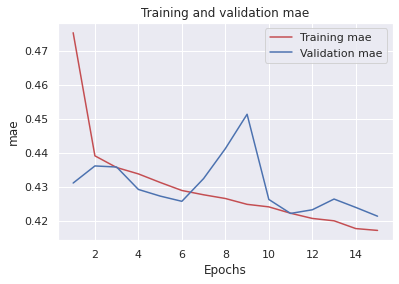

In [48]:
draw_graphics(fit_history)

In [52]:
mae = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Средняя абсолютная ошибка: {mae}')

Средняя абсолютная ошибка: 0.4216764569282532


In [53]:
y_pred = model.predict(X_test)
mae = performance_metric(np.exp(y_test), np.exp(y_pred))
print(f'Средняя абсолютная ошибка (значение): {mae}')

Средняя абсолютная ошибка (значение): 1169.5287853082154


In [54]:
model.save(f'/content/drive/My Drive/Colab Notebooks/lab1_mae_{int(mae)}.h5')